# JSON-stat to Pandas dataframe - using a function

In [1]:
import json
import pandas as pd
import requests
# pyjstat is the package to read JSON-stat, 'pip install pyjstat' 
from pyjstat import pyjstat

## Alternative 1, Paste POST Url og JSON query

In [2]:
# Paste PostUrl where you you want the query posted
postUrl = "https://data.ssb.no/api/v0/en/table/07459/"
# E.g. 
#postUrl = "https://data.ssb.no/api/v0/en/table/07459/"

In [3]:
# You get Query and endpoint to API-et from Statbank or API console. 
# apiQuery = # Paste your query here

# Example using minimalist query.
# Minimalist query like this is not recommended, unless you understand the principles on elimination in StatBank. 

apiQuery = {
      "query": [
      ],
      "response": {
        "format": "json-stat2"
      }
    }

In [4]:
# Function to convert the extraction into 2 dataframes, takes 2 parameters

def apiToDataframe(postUrl, query):

	# postUrl PostUrl where you you want the query posted
	res = requests.post(postUrl, json=query)
	# put the result in variable ds. Here you also have some metadata
	ds = pyjstat.Dataset.read(res.text)
	# write resultatet to 2 dataframes
    # first dataframe with text
	df = ds.write('dataframe')
    # next dataframe with codes
	df_id = ds.write('dataframe', naming='id')
    # returner also ds if one need metadata
	return df, df_id, ds


Output from apiToDataframe goes into three variables

In [5]:
df, df_id, ds = apiToDataframe(postUrl, apiQuery)

Show dataframe with text. (Total Population Norway 1986- )

In [6]:
df.head(4)

,contents,year,value
0,Persons,1986,4159187
1,Persons,1987,4175521
2,Persons,1988,4198289
3,Persons,1989,4220686


In [7]:
df.tail(2)

,contents,year,value
38,Persons,2024,5550203
39,Persons,2025,5594340


Dataframe with codes

In [8]:
df_id.head(4)

,ContentsCode,Tid,value
0,Personer1,1986,4159187
1,Personer1,1987,4175521
2,Personer1,1988,4198289
3,Personer1,1989,4220686


In [9]:
df_id.tail(2)

,ContentsCode,Tid,value
38,Personer1,2024,5550203
39,Personer1,2025,5594340


The whole datasettet as list of lists. In 2025 there came more metadadata.

In [10]:
ds

Dataset([('version', '2.0'),
         ('class', 'dataset'),
         ('label', '07459: Population, by contents and year'),
         ('source', 'Statistics Norway'),
         ('updated', '2025-02-25T07:00:00Z'),
         ('role',
          OrderedDict([('time', ['Tid']), ('metric', ['ContentsCode'])])),
         ('id', ['ContentsCode', 'Tid']),
         ('size', [1, 40]),
         ('dimension',
          OrderedDict([('ContentsCode',
                        OrderedDict([('label', 'contents'),
                                     ('category',
                                      OrderedDict([('index',
                                                    OrderedDict([('Personer1',
                                                                  0)])),
                                                   ('label',
                                                    OrderedDict([('Personer1',
                                                                  'Persons')])),
                   

Show updated date

In [11]:
ds['updated']

'2025-02-25T07:00:00Z'

Table ID and short tabletitle are new metadata i JSON-stat2. Get tableid (tablenumber)

In [12]:
ds['extension']['px']['tableid']

'07459'

Short tabletitle is useful when generating titles eg. in charts

In [13]:
ds['extension']['px']['contents']

'07459: Population,'

## Alternative 2 
### Function "jsqToTab" to get data via PxWebApi from a saved API-query on local file

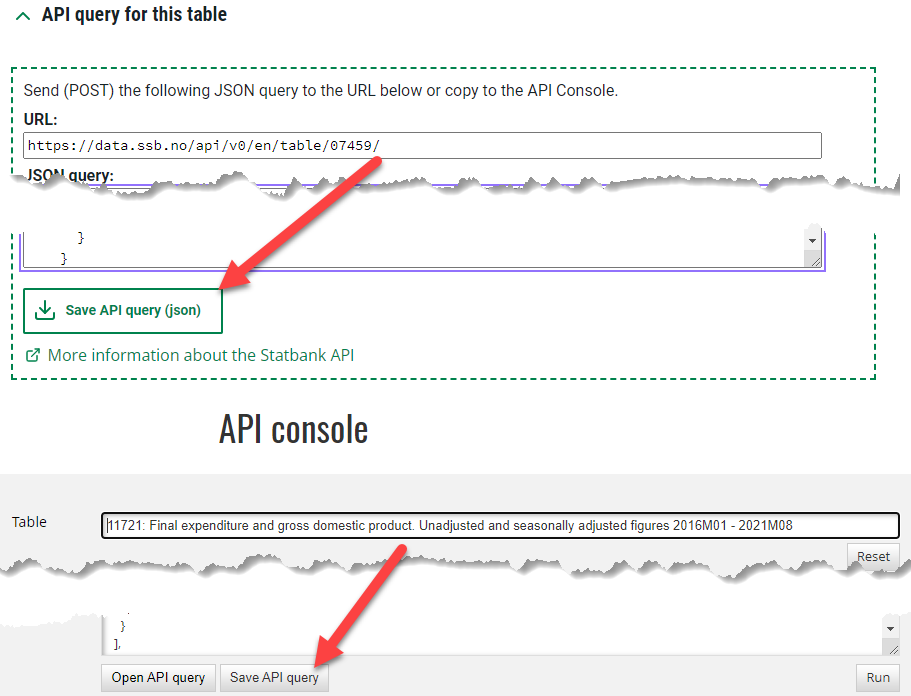

In [14]:
import os

In [15]:
# Function jsqToTab takes 2 parameters
# It reads files with names like ssbapitable_03013.json, where 03013 is the ID to the table. 
# The example assumes that the query file is in the same directory as the notebook.
# This function takes the ID on stored API query (or Statbank table) as input
# 'lang' can set language, default is Norwegian
# the function returns two data frames, one with text and one with codes

def jsqToTab(qid, lang='no'):
	#
	savedApiQuery = json.load(open('ssbapi_table_' + qid + '.json'))
	# Find query and table ID
	apiQuery = savedApiQuery['queryObj']
	tabId = savedApiQuery['tableIdForQuery']
	# PostUrl for query
	# Query an endpoint API-et kcan be retrieved from Statbank.
	postUrl = "https://data.ssb.no/api/v0/" + lang + "/table/" + tabId
	res = requests.post(postUrl, json=apiQuery)
	# put result in ds
	ds = pyjstat.Dataset.read(res.text)
	# write result to two dataframes, one code and one text
	df_id = ds.write('dataframe', naming='id')
	df = ds.write('dataframe')

	return df, df_id

In [16]:
df, df_id = jsqToTab("07459", 'en') #insert 5-digit table ID eg. 07459 and language.

Here I have used the file  *ssbapi_table_07459.json* and inserted "07459"

In [17]:
df.head(4)

,region,sex,age,contents,year,value
0,Halden,Females,0-9 years,Persons,2023,1453
1,Halden,Females,0-9 years,Persons,2024,1440
2,Halden,Females,10-19 years,Persons,2023,1851
3,Halden,Females,10-19 years,Persons,2024,1841


In [18]:
df_id.head(4)

,Region,Kjonn,Alder,ContentsCode,Tid,value
0,K-3101,2,F00-09,Personer1,2023,1453
1,K-3101,2,F00-09,Personer1,2024,1440
2,K-3101,2,F10-19,Personer1,2023,1851
3,K-3101,2,F10-19,Personer1,2024,1841


df with codes is the same in Norwegian and in English